# Issue frequency notebook

## Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [15]:
# %load imports.py
# Basic imports
import os

# SQL database
import pymysql

# Classical external libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

import seaborn as sns
sns.set(style="darkgrid")

# Import py files for generic functions
from sql_db import *
from generic_functions import *


## Connection to DB

In [16]:
# Connexion database
engine = db_engine()

## Load Useful Data

In [5]:
newspapers_df = read_table('impresso.newspapers', engine)
issues_df = read_table('impresso.issues', engine)

In [6]:
newspapers_languages_df = read_table('newspapers_languages', engine)
languages_df = read_table('languages', engine)
LANGUAGES = languages_df.code.unique()

In [7]:
newspapers_metadata_df = read_table('newspapers_metadata', engine)
meta_properties_df = read_table('meta_properties', engine)
PROPERTIES = meta_properties_df.name.unique()

## Number of newspaper issues by year/decade, filtered by provenance / language

In [8]:
# Create new decade column
issues_df['decade'] = issues_df.apply(lambda row: row.year-row.year%10, axis = 1) 

In [17]:
time_granularity = 'decade' # put 'year' to have statistics per year

# NP we are interested in : default is all use functions np_by_language / np_by_property to filter np
#newspapers_select = newspapers_df['id'].unique() #default : all
newspapers_select = ['GDL', 'JDG', 'NZZ'] # for rapid visualization
#newspapers_select = np_by_property(newspapers_metadata_df, meta_properties_df, 'countryCode', 'CH')

issues_df_select = filter_df_by_np_id(issues_df, newspapers_select)

columns_group = ['newspaper_id', time_granularity]

nb_issue_per_np_time_id, _, _ = group_and_count(issues_df_select, columns_group, 'id', print_=False)

Column last_modified is often NaT, which is why the count is not the same. For that others we always have the same number so we can take any column (and we take 'id').

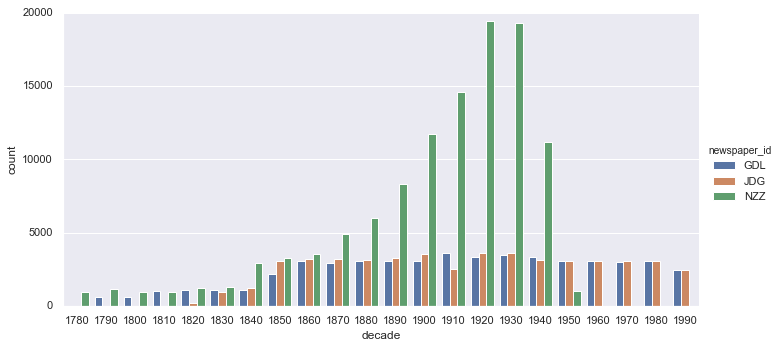

In [19]:
# Plot
sns.catplot(x=time_granularity, y="count", hue="newspaper_id", kind="bar", \
            data=nb_issue_per_np_time_id, height=5, aspect=2);

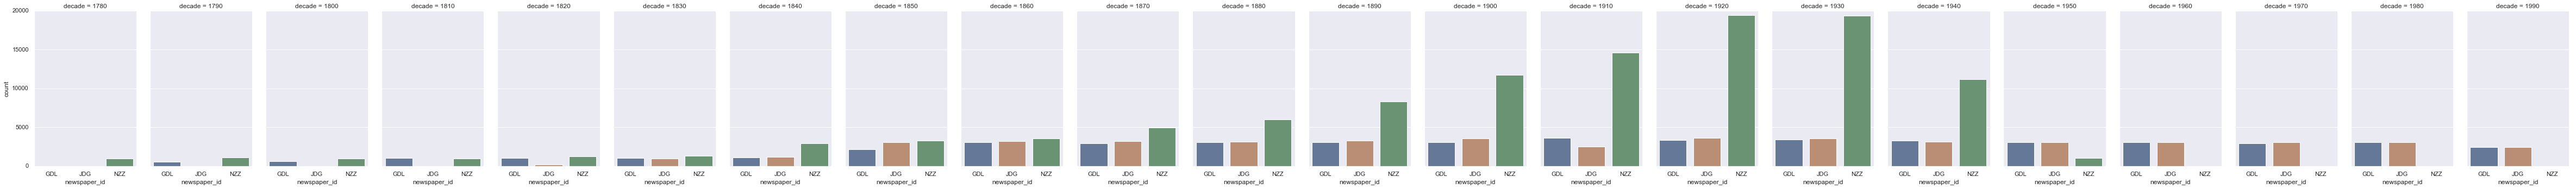

In [20]:
g = sns.catplot(x="newspaper_id", y="count", col=time_granularity, data=nb_issue_per_np_time_id,
                saturation=.5, kind="bar", ci=None, aspect=.6);